In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Remove the customerID column as its of no use

df.drop('customerID', axis = 1, inplace = True)

In [6]:
# Change data type form Object to numeric.
# After running this code, it will show "ValueError: Unable to parse string " " at position 488"

# pd.to_numeric(df['TotalCharges'])

In [7]:
# we have to remove string(" ") first

df[df.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Total 11 rows have " " values. So we can skip those rows

df.drop(df[df.TotalCharges == ' '].index, inplace = True)

In [9]:
df.shape

(7032, 20)

In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA

In [12]:
# Charges and tenure may affect the churn rate, lets explore it!

tenure_churn = df[df.Churn == 'Yes'].tenure
tenure_no_churn = df[df.Churn == 'No'].tenure

mon_charges_churn = df[df.Churn == 'Yes'].MonthlyCharges
mon_charges_no_churn = df[df.Churn == 'No'].MonthlyCharges

tot_charges_churn = df[df.Churn == 'Yes'].TotalCharges
tot_charges_no_churn = df[df.Churn == 'No'].TotalCharges

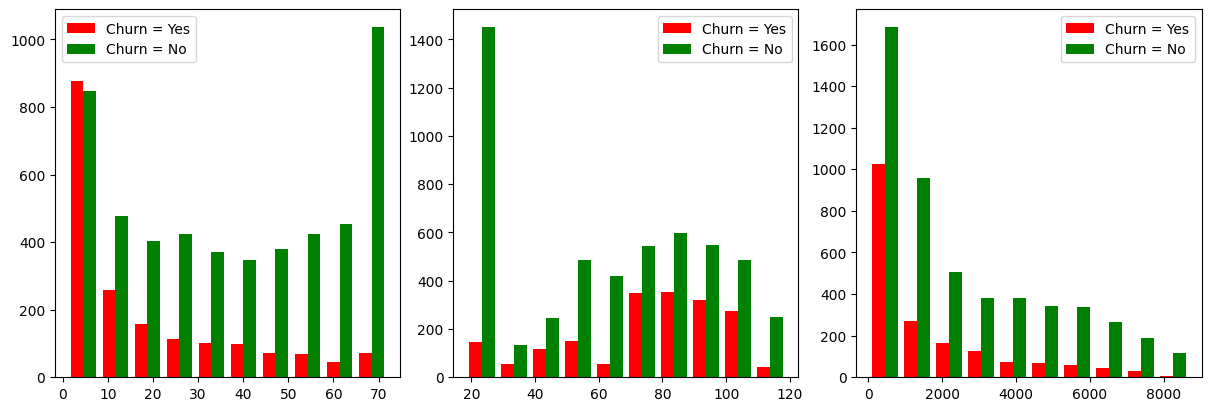

In [13]:
# Ploting the graph for visualization

fig, axs = plt.subplots(1, 3, figsize = (12,4), constrained_layout = True)
axs[0].hist([tenure_churn, tenure_no_churn], color = ['Red', 'Green'], label = ['Churn = Yes', 'Churn = No'])
axs[0].legend()

axs[1].hist([mon_charges_churn, mon_charges_no_churn], color = ['Red', 'Green'], label = ['Churn = Yes', 'Churn = No'])
axs[1].legend()

axs[2].hist([tot_charges_churn, tot_charges_no_churn], color = ['Red', 'Green'], label = ['Churn = Yes', 'Churn = No'])
axs[2].legend()

plt.show()

In [14]:
# The 1st graph shows that most of the customers churns in the tenure range 0-10, and as the tenure increases customer churn ratio decreases

# The 2nd graph shows that as the monthly charges increases beyond 60-70 range, churn ratio also increases

# The 3rd graph shows that, most of the customers churns when the total charges is below  2000

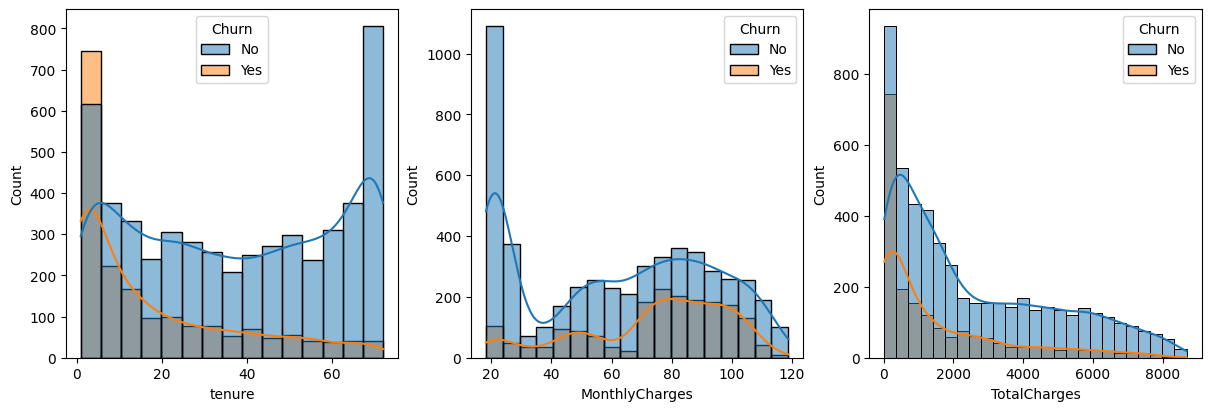

In [15]:
# Another way of ploting the graph for advanced visualization
fig, axs = plt.subplots(1,3, figsize = (12, 4), constrained_layout = True)

sns.histplot(data = df, x = 'tenure', hue = 'Churn', kde = True, ax = axs[0])
sns.histplot(data = df, x = 'MonthlyCharges', hue = 'Churn', kde = True, ax = axs[1])
sns.histplot(data = df, x = 'TotalCharges', hue = 'Churn', kde = True, ax = axs[2])

plt.show()

1. Tenure
Churn is highest for low-tenure customers (0–5 months). This means many customers decide to leave the service relatively quickly, within the first few months.
Churn decreases significantly as tenure increases. Customers who stay for longer periods (e.g., over 40 months) rarely churn (the orange bars/line are minimal at higher tenures).

Implication: Customer retention strategies might be most critical during the early months of service, as churn likelihood is highest then.

2. Monthly Charges
Non-churners have a wide spread of monthly charges, but you see a large concentration around 20–30 and then again from 70–100.
Customers with very low monthly charges (under 20) are mostly non-churners (the blue bar/line is high in that region), which could indicate a “basic plan” segment that tends to stick around.
Moderate-to-high monthly charges (e.g., $70–100) still see some churn; it’s lower in absolute terms than non-churners, but it’s notable that churners are present in that higher-price bracket, too.

3. Total Charges
Churners tend to cluster heavily at the lower total charges (under 1,000). This aligns with having a short tenure; they haven’t accrued many charges if they left early.
Very few churners show up in the higher total charges range (above 2,000–3,000), again suggesting that long-standing, high total-charge customers rarely leave.
As customers stay longer, they seem less likely to churn, leading to higher total charges and a strong retention rate.

Implication: There is a strong negative relationship between total charges and churn—most churners have low total charges because they leave the service early on. Long-term customers (with high total charges) show low churn rates.

In [16]:
def print_uniq_col_val(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col}: {df[col].unique()}")

In [17]:
print_uniq_col_val(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
# Some columns have same entries with another names like No internet service, No phone service can be written as 'No'

df.replace('No phone service', 'No', inplace = True)
df.replace('No internet service', 'No', inplace = True)

In [19]:
print_uniq_col_val(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
# Lets visualize the different features

cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

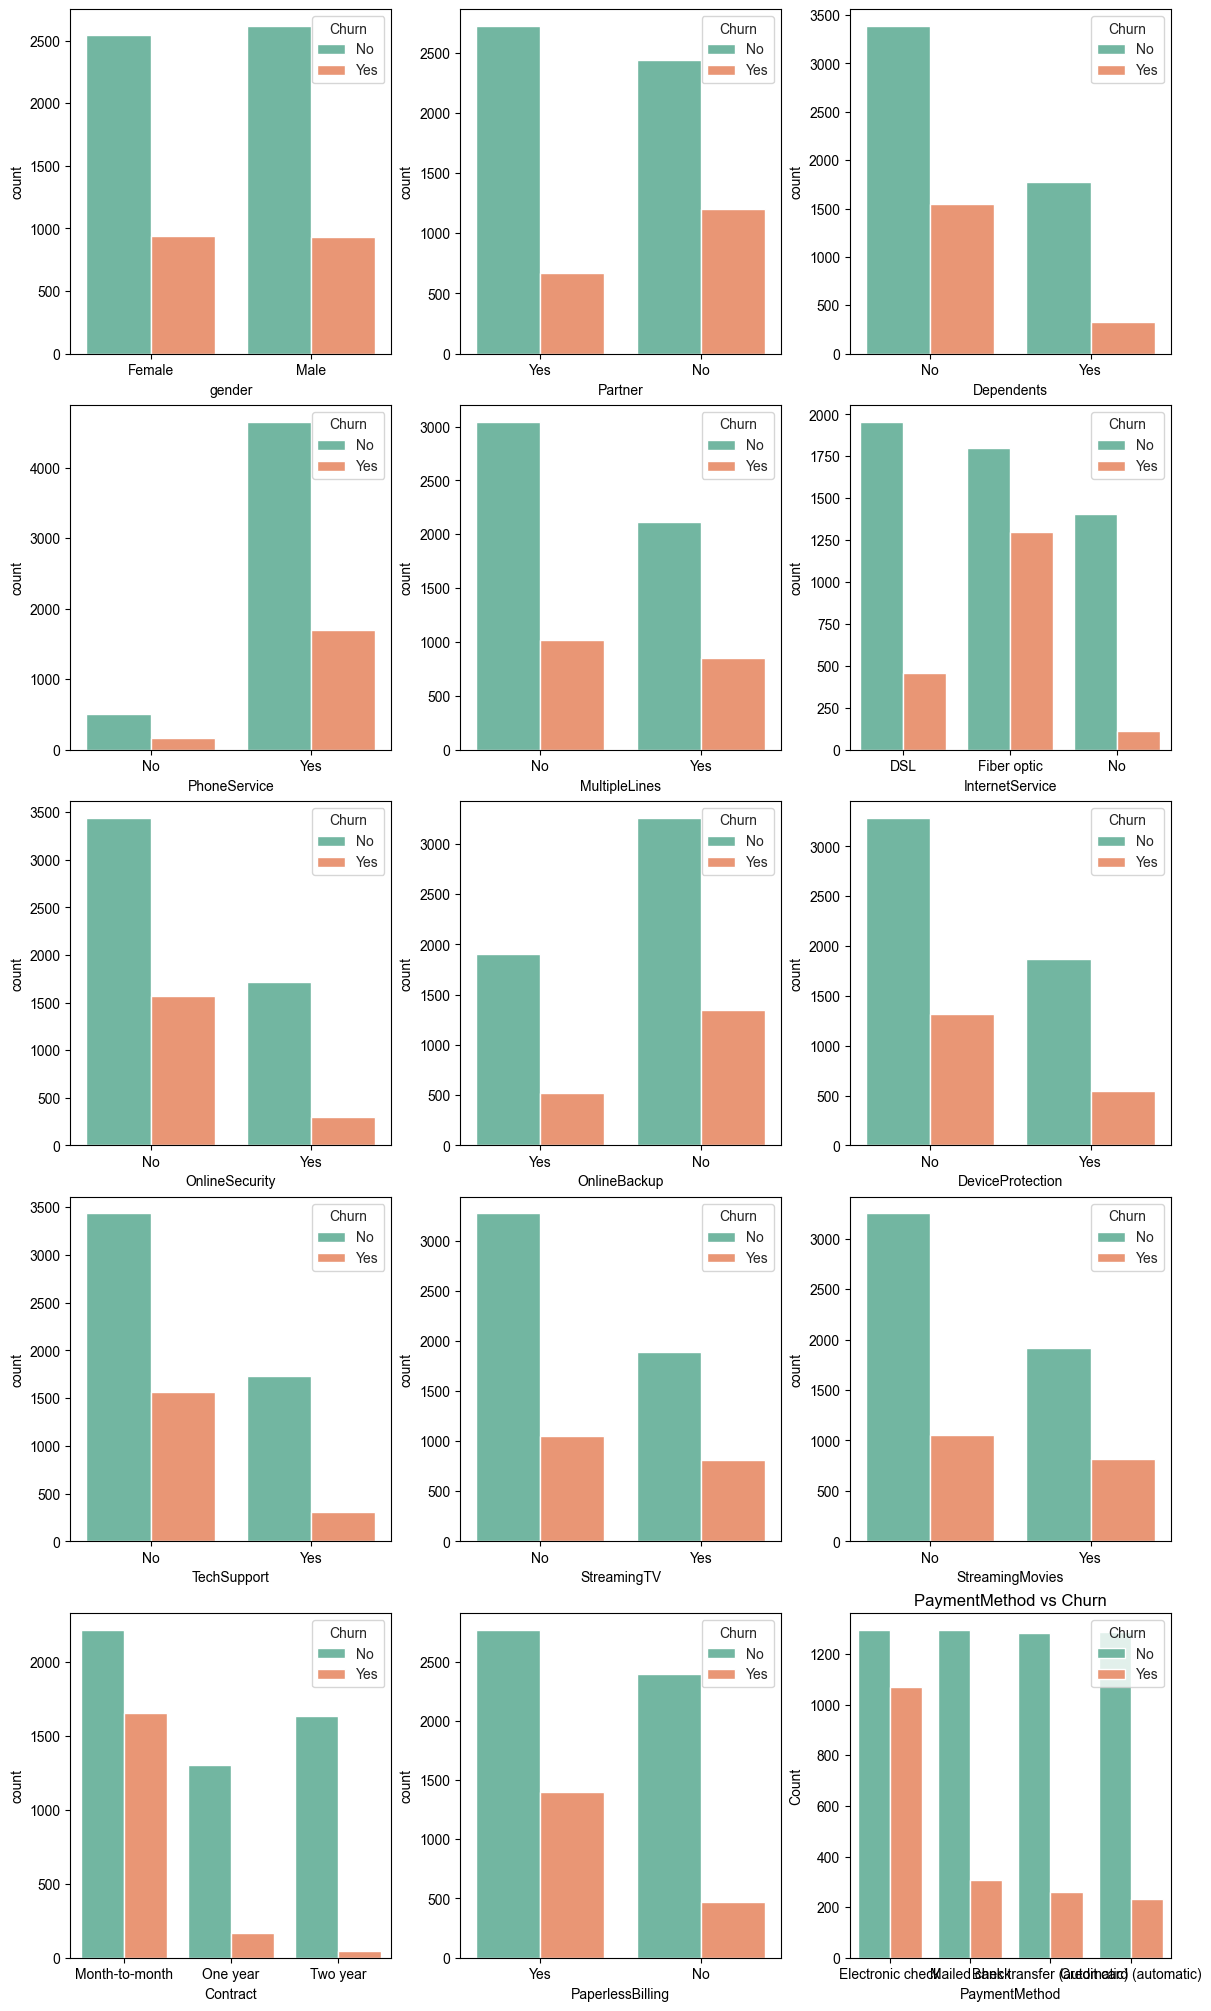

In [21]:
fig, axs = plt.subplots(5,3, figsize=(12, 20), constrained_layout = True)
axs = axs.ravel()
sns.set_style('whitegrid')

for i, col in enumerate(cols):
    sns.countplot(data=df, x= col, hue='Churn', ax = axs[i], palette='Set2')

plt.title(f"{col} vs Churn")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

# Insights

Customers having partners have less churn ratio than customer of without partner.

Customers having Fibre optic internet service, month to month contract, electronic check payment method have high churn ratios.


In [22]:
print_uniq_col_val(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Machine Learning

#### 1) Separate X and y
#### 2) Train -test split
#### 3) X_train
    Separate Numerical and Categorical cols
        Numerical cols:
            Scale it using MinMaxScaler or StandardScaler
        Categorical cols:
            Separate Ordinal and Nominal cols from Categorical cols
            Encode them accordingly
            join transformed ordinal and nominal cols to create transformed categorical col
        join both Numberical and Categorical cols to get X_train_transformed

#### 4) X_test
    Do same step (step 3) on X_test, but use only .trasform to prevent data leakage

#### 5) Model training
    Select the specified model for specific task (Classification or Regression)
    Regression algo:
        1) Linear Regression
        2) Decision Tree Regressor
        3) Random forest regressor
        4) Gradient Boosted Regression Trees (XGBoost)
        5) Support Vector Regression (SVR)
        6) KNN Regression
        7) Ridge Regression (L2 regularixation)
        8) Lasso Regression (L1 regularization)
    Classification algo:
        1) Decision Tree
        2) Random forest classifier
        3) Naive Bayes
        4) KNneighbour
        5) XGBoost
        6) Supprot Vector Machine (SVM)

    Initialize the model
    provide the model X_train, y_train
    then predict y_pred using X_test
    then evaluate y_pred and y_test 

In [23]:
X = df.drop(columns = 'Churn')
y = df['Churn']

In [24]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 19) (5625,)
(1407, 19) (1407,)


In [25]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [26]:
# Separating Categorical and Numerical features

X_train_cat = X_train.select_dtypes(include = object)
X_train_num = X_train.select_dtypes(exclude = object)

In [27]:
X_train_cat.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3457,Female,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
612,Male,No,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check


In [28]:
X_train_num.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3457,0,1,19.50,19.5
612,0,66,20.55,1357.1


# Scaling numerical features

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_train_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train_num),
                                       columns = minmax_scaler.get_feature_names_out(),
                                       index = X_train_num.index)

X_train_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3457,0.0,0.000000,0.012438,0.000081
612,0.0,0.915493,0.022886,0.154431
589,0.0,0.985915,0.717910,0.767280
2685,0.0,1.000000,0.819900,0.844132
1549,0.0,0.000000,0.274627,0.003121


In [30]:
# check that min = 0 and max = 1

X_train_num_transformed.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5625.00,5625.00,5625.00,5625.00
mean,0.16,0.44,0.46,0.26
std,0.37,0.35,0.30,0.26
min,0.00,0.00,0.00,0.00
25%,0.00,0.11,0.17,0.04
50%,0.00,0.39,0.52,0.16
75%,0.00,0.76,0.71,0.43
max,1.00,1.00,1.00,1.00


# Encoding Categorical features

### 1) Separate nominal and ordinal cols
### 2) Encode them separately
### 3) combine both encoded cols to get single encoded categorical col

In [31]:
# (OHE for nominal cols and OrdinalEncoding for ordinal cols)

nominal_col = ['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod', 'Churn']
ordinal_col = ['Contract']

In [32]:
nominal_col = X_train_cat.drop(columns = ordinal_col)
nominal_col.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
3457,Female,No,No,Yes,No,No,No,No,No,No,No,No,Yes,Mailed check
612,Male,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Mailed check


In [33]:
ordinal_col = X_train_cat.drop(columns = nominal_col)
ordinal_col.head(2)

,Contract
3457,Month-to-month
612,Two year


# Nominal Columns Transformation

In [34]:
# Check if there is any category that is rarely occuring
for col in nominal_col:
    print()
    print(f"{col}: {nominal_col[col].value_counts()}")


gender: gender
Male      2839
Female    2786
Name: count, dtype: int64

Partner: Partner
No     2923
Yes    2702
Name: count, dtype: int64

Dependents: Dependents
No     3946
Yes    1679
Name: count, dtype: int64

PhoneService: PhoneService
Yes    5093
No      532
Name: count, dtype: int64

MultipleLines: MultipleLines
No     3219
Yes    2406
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    2483
DSL            1936
No             1206
Name: count, dtype: int64

OnlineSecurity: OnlineSecurity
No     4015
Yes    1610
Name: count, dtype: int64

OnlineBackup: OnlineBackup
No     3674
Yes    1951
Name: count, dtype: int64

DeviceProtection: DeviceProtection
No     3682
Yes    1943
Name: count, dtype: int64

TechSupport: TechSupport
No     3963
Yes    1662
Name: count, dtype: int64

StreamingTV: StreamingTV
No     3444
Yes    2181
Name: count, dtype: int64

StreamingMovies: StreamingMovies
No     3457
Yes    2168
Name: count, dtype: int64

PaperlessBilling: Paperle

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first',
                    min_frequency = 500,
                    sparse_output = False,
                    handle_unknown = 'ignore')

X_train_nom_transformed = pd.DataFrame(ohe.fit_transform(nominal_col),
                                       columns = ohe.get_feature_names_out(),
                                       index = nominal_col.index)

print("Shape of the data before transformation:", nominal_col.shape)
print("Shape of the data after transformation:", X_train_nom_transformed.shape)

Shape of the data before transformation: (5625, 14)
Shape of the data after transformation: (5625, 17)


# Ordinal Columns Transformation

In [36]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [37]:
contract_cat = ['Month-to-month', 'One year', 'Two year']

In [38]:
from sklearn.preprocessing import OrdinalEncoder

or_en = OrdinalEncoder(categories = [contract_cat],
                    handle_unknown = "use_encoded_value",
                    unknown_value = -1,
                    encoded_missing_value = -5)

X_train_ord_transformed = pd.DataFrame(or_en.fit_transform(ordinal_col),
                                       columns = or_en.get_feature_names_out(),
                                       index = ordinal_col.index)
X_train_ord_transformed.head()

,Contract
3457,0.0
612,2.0
589,2.0
2685,2.0
1549,0.0


## Concatenate Ordinal and Nominal to get X_train_cat_transformed

In [39]:
X_train_cat_transformed = pd.concat([X_train_nom_transformed, X_train_ord_transformed],
                                    axis = 1)

X_train_cat_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
612,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
589,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0
2685,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1549,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Concatenate Transformed Numerical and Categorical column to get X_train_transformed
### (X_train_num_transformed, X_train_cat_transformed)

In [40]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed],
                                axis = 1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3457,0.0,0.000000,0.012438,0.000081,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
612,0.0,0.915493,0.022886,0.154431,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
589,0.0,0.985915,0.717910,0.767280,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0
2685,0.0,1.000000,0.819900,0.844132,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1549,0.0,0.000000,0.274627,0.003121,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
X_train_transformed.dtypes

SeniorCitizen                            float64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                              float64
Partner_Yes                              float64
Dependents_Yes                           float64
PhoneService_Yes                         float64
MultipleLines_Yes                        float64
InternetService_Fiber optic              float64
InternetService_No                       float64
OnlineSecurity_Yes                       float64
OnlineBackup_Yes                         float64
DeviceProtection_Yes                     float64
TechSupport_Yes                          float64
StreamingTV_Yes                          float64
StreamingMovies_Yes                      float64
PaperlessBilling_Yes                     float64
PaymentMethod_Credit card (automatic)    float64
PaymentMethod_Electronic check           float64
PaymentMethod_Mailed

## Apply Same steps on X_test 
    (Use only ".transformed" for prevent data leakage
    1) Separate Num and Cat cols
    2) Transform Num cols >> X_test_num_transformed
    3) Separate ordinal and Nominal cols form Cat cols
    4) Encode them accordingly
    5) Concatenate Ordinal and Nominal cols >> X_test_num_transformed
    6) Concatenate Num_transformed and Cat_trnasformed >> X_test_transformed

In [42]:
X_test_num = X_test.select_dtypes(exclude = object)
X_test_cat = X_test.select_dtypes(include = object)

In [43]:
X_test_num.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1778,0,72,24.75,1859.10
5036,1,16,85.35,1375.15


In [44]:
X_test_cat.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1778,Male,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic)
5036,Female,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)


In [45]:
X_test_num_transformed = pd.DataFrame(minmax_scaler.transform(X_test_num),
                                      columns = minmax_scaler.get_feature_names_out(),
                                      index = X_test_num.index)

X_test_num_transformed.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1778,0.0,1.000000,0.064677,0.212359
5036,1.0,0.211268,0.667662,0.156514


In [46]:
X_test_num_transformed.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1407.00,1407.00,1407.00,1407.00
mean,0.16,0.45,0.46,0.26
std,0.36,0.35,0.30,0.25
min,0.00,0.00,0.01,0.00
25%,0.00,0.11,0.16,0.05
50%,0.00,0.39,0.52,0.16
75%,0.00,0.77,0.71,0.44
max,1.00,1.00,0.98,0.98


## Categorical Encoding

In [47]:
X_test_nominal_cols = X_test_cat.drop(columns = ordinal_col)
X_test_nominal_cols.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
1778,Male,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Credit card (automatic)
5036,Female,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Yes,Credit card (automatic)


In [48]:
X_test_ordinal_cols = X_test_cat.drop(columns = nominal_col)
X_test_ordinal_cols.head(2)

,Contract
1778,Two year
5036,Month-to-month


In [49]:
X_test_nom_transformed = pd.DataFrame(ohe.transform(X_test_nominal_cols),
                                      columns = ohe.get_feature_names_out(),
                                      index = X_test_nominal_cols.index)

print("Shape of data before transformation:", X_test_nominal_cols.shape)
print("Shape of data after transformation:", X_test_nom_transformed.shape)

Shape of data before transformation: (1407, 14)
Shape of data after transformation: (1407, 17)


In [50]:
X_test_ord_transformed = pd.DataFrame(or_en.transform(X_test_ordinal_cols),
                                      columns = or_en.get_feature_names_out(),
                                      index = X_test_ordinal_cols.index)

X_test_ord_transformed.head(2)

,Contract
1778,2.0
5036,0.0


In [51]:
X_test_cat_transformed = pd.concat([X_test_nom_transformed, X_test_ord_transformed],
                                   axis = 1)

X_test_cat_transformed.head(2)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
1778,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
5036,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [52]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed],
                                   axis = 1)

X_test_transformed.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
1778,0.0,1.000000,0.064677,0.212359,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
5036,1.0,0.211268,0.667662,0.156514,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


# Training and Testing phase (Decision Trees)

In [53]:
import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.7121535181236673
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.80      0.80      1041
         Yes       0.45      0.48      0.46       366

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.63      1407
weighted avg       0.72      0.71      0.71      1407

Confusion Matrix:
 [[828 213]
 [192 174]]
Execution time: 0.424191951751709 seconds


# Training and Testing phase (Naive Bayes)

In [54]:
import time
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.7547974413646056
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.84      0.83      1041
         Yes       0.53      0.52      0.53       366

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

Confusion Matrix:
 [[871 170]
 [175 191]]
Execution time: 0.8593475818634033 seconds


# Training and Testing phase (Random forest)

In [55]:
import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.7910447761194029
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.90      0.86      1041
         Yes       0.63      0.48      0.54       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[939 102]
 [192 174]]
Execution time: 1.5638151168823242 seconds


In [56]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [57]:
# As the target column has imbalanced class so use class weighs

import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.7896233120113717
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.90      0.86      1041
         Yes       0.63      0.47      0.54       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[940 101]
 [195 171]]
Execution time: 1.8762454986572266 seconds


### Ridge/Lasso

In [70]:
from sklearn.linear_model import LogisticRegression

ridge_model = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'liblinear')
ridge_model.fit(X_train_transformed, y_train)

y_pred = ridge_model.predict(X_test_transformed)
print("Ridge accuracy:", accuracy_score(y_test, y_pred))

Ridge accuracy: 0.7974413646055437


In [69]:
from sklearn.linear_model import LogisticRegression

lasso_model = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')
lasso_model.fit(X_train_transformed, y_train)

y_pred = lasso_model.predict(X_test_transformed)
print("Lasso accuracy:", accuracy_score(y_test, y_pred))

Lasso accuracy: 0.7974413646055437


## XGBoost Classifier

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
y_train_encoded = l_encoder.fit_transform(y_train)
y_test_encoded = l_encoder.transform(y_test)

model = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    n_estimators = 100,
    max_depth = 5,
    learning_rate = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8
)

model.fit(X_train_transformed, y_train_encoded)

y_pred = model.predict(X_test_transformed)

y_pred_prob = model.predict_proba(X_test_transformed)[:,1]

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

Accuracy: 0.8024164889836531
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.66      0.51      0.57       366

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [79]:
# Training accuracy
y_train_pred = model.predict(X_train_transformed)
print("Training accuracy:", accuracy_score(y_train_encoded, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test_encoded, y_pred))

Training accuracy: 0.8471111111111111
Testing accuracy: 0.8024164889836531


In [80]:
# It looks our model is best fit model